In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from utils.hpatch import *
from utils.tasks import *
from utils.misc import *
import os
import time
import dill
import numpy as np
import sys
__doc__ = r"""Evaluation code for the HPatches homography patches dataset.

Usage:
  hpatches_eval.py (-h | --help)
  hpatches_eval.py --version
  hpatches_eval.py --descr-name=<> --task=<>... [--descr-dir=<>] [--results-dir=<>] [--split=<>] [--dist=<>] [--delimiter=<>] [--pcapl=<>]

Options:
  -h --help         Show this screen.
  --version         Show version.
  --descr-name=<>   Descriptor name, e.g. sift
  --descr-dir=<>    Descriptor results root folder. [default: {root}/data/descriptors]
  --results-dir=<>  Results root folder. [default: results]
  --task=<>         Task name. Valid tasks are {verification,matching,retrieval}.
  --split=<>        Split name. Valid are {a,b,c,full,illum,view}. [default: a]
  --dist=<>         Distance name. Valid are {L1,L2}. [default: L2]
  --delimiter=<>    Delimiter used in the csv files. [default: ,]
  --pcapl=<>        Compute results for pca-power law descr. [default: no]

For more visit: https://github.com/hpatches/
"""
from utils.docopt import docopt

In [26]:
#descs = ['rootsift', 'hardnet+', "HardNetAmos", "SoSNet", "HardNet6Br", "HardNetPS"]
descs = ['rootsift', 'hardnet+',"SoSNet", "HardNet6Br", "HardNetPS", "HardNetAmosOnlyv4", "HardNet_8_256AmosOnlyv4"]
#descs = ['rootsift', 'hardnet+',  "HardNetAmosOnlyv4"]

NUISS = ['trjitter', 'scjitter', 'rotjitter', 'overlaps', 'anisjitter']

In [27]:
def get_data(desc_name):
    out = {}
    fname_res = f"{desc_name}_detailed.npz"
    res_dict = np.load(fname_res, allow_pickle=True)['arr_0'].item()
    for by in NUISS:
        x = np.abs(res_dict[by])
        idxs = np.argsort(x[:,0])[::-1]
        x = x[idxs]
        y = res_dict['correct'][idxs]
        xx = []
        yy = []
        perc = []
        limits = np.min(x), np.max(x)+1e-4
        num = 20
        range1 = np.linspace(*limits, num+1)
        for idx, th in enumerate(range1):
            if idx == len(range1) - 1:
                break
            th_next =range1[idx+1]
            mask = (x >= th) & (x < th_next)
            acc =  np.mean(y[mask])
            perc_patches = mask.astype(np.float).mean()
            xx.append(th)
            perc.append(perc_patches)
            yy.append(acc)
        out[by] = (xx,yy)
    return out
results = {}
for d in descs:
    results[d] = get_data(d)

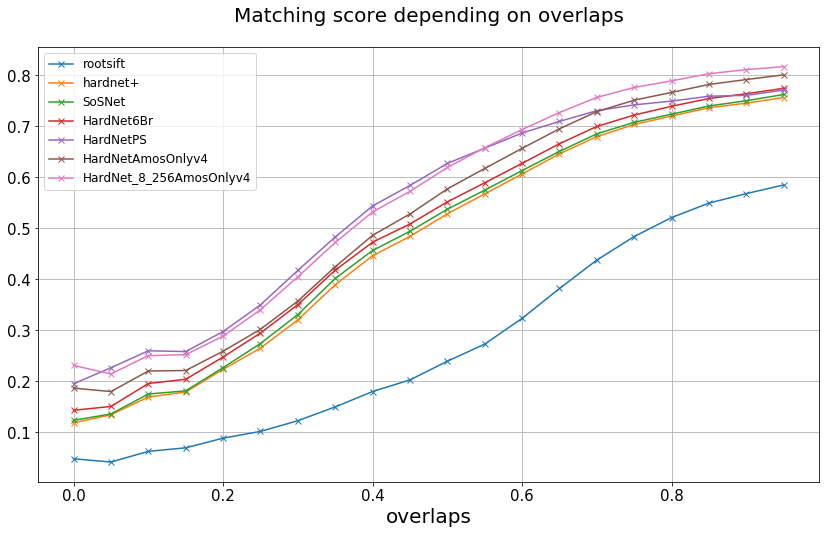

In [49]:
size=20

params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
def plot_descs(results, by='overlaps'):
    plt.figure(figsize=(14,8))
    leg = []
    for d, res in results.items():
        leg.append(d)
        if 'sc' in by or 'an'in by:
            plt.semilogx(*res[by], '-x')
            ticks = [x for i,x in  enumerate(res[by][0]) if i % 2 == 0]
            
            ticks_text = [f'{x:.2f}' for i,x in  enumerate(res[by][0]) if i % 2 == 0]
            
            plt.xticks(ticks,ticks_text)
        else:
            plt.plot(*res[by], '-x')
    plt.title(f'Matching score depending on {by}')
    plt.xlabel(by)
    plt.grid('on')
    plt.legend(leg)
    return
plot_descs(results, 'overlaps')

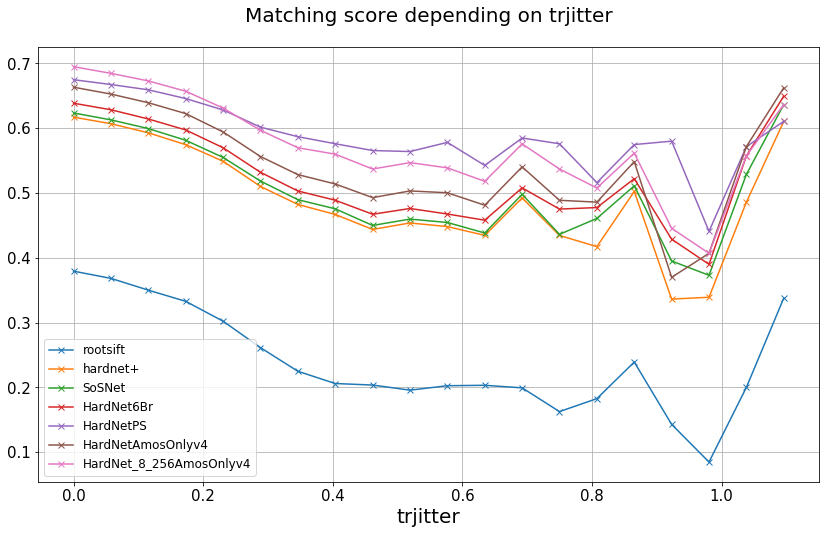

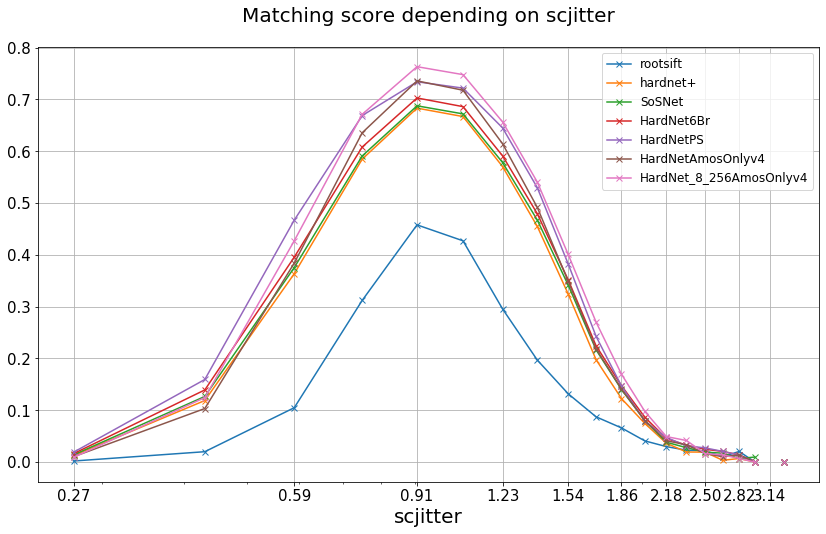

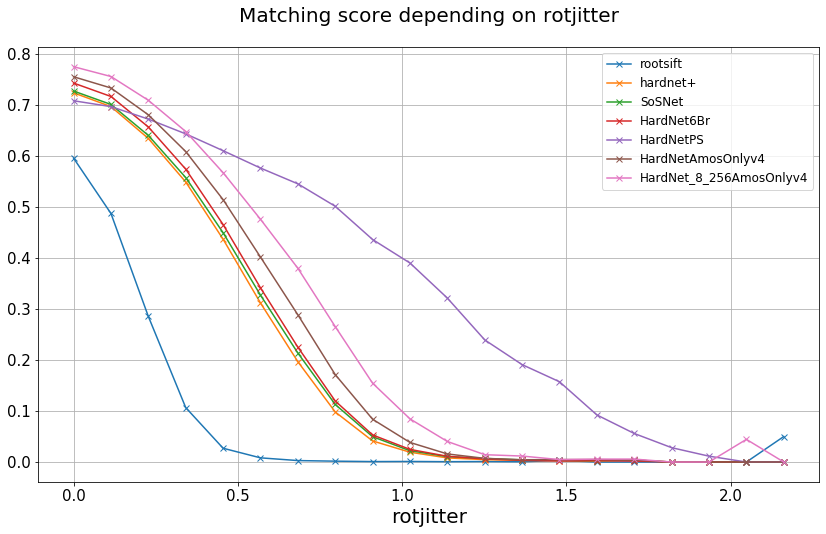

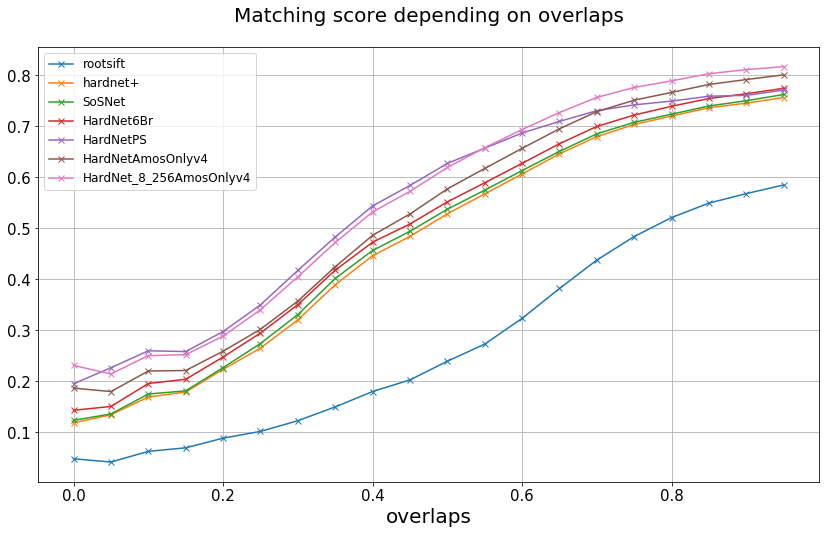

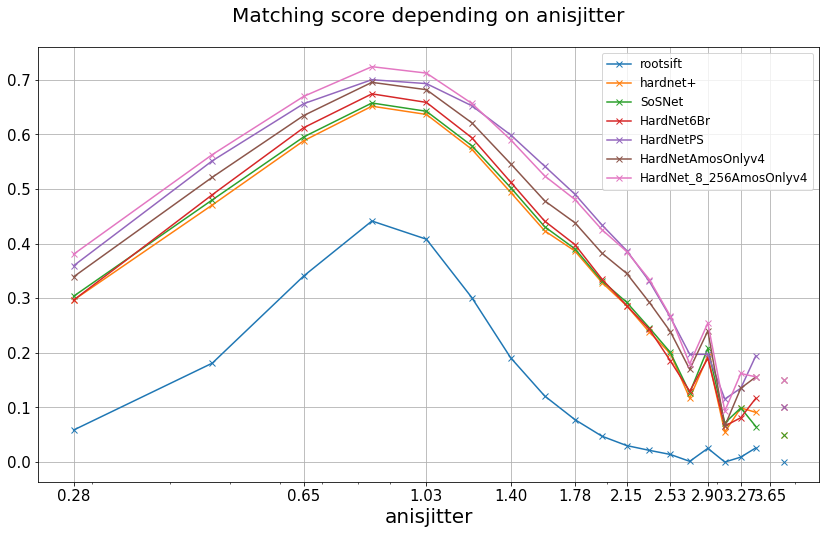

In [50]:
plt.close('all')
for factor in NUISS:
    plot_descs(results, factor)